In [1]:
import matplotlib.pyplot as plt

import numpy as np
import cv2
import os
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
import math

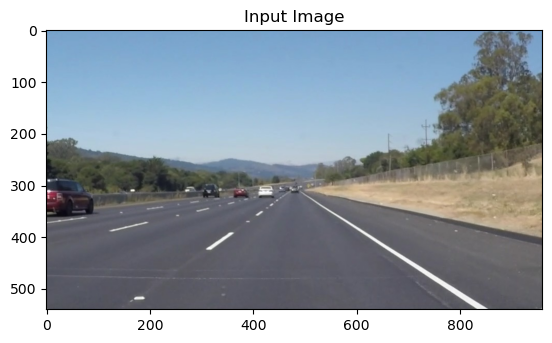

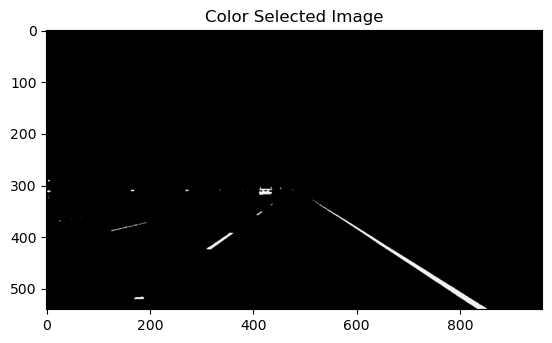

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('c:/Users/RATHIKA/test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()

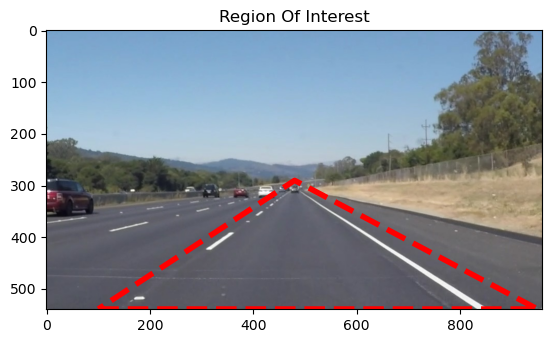

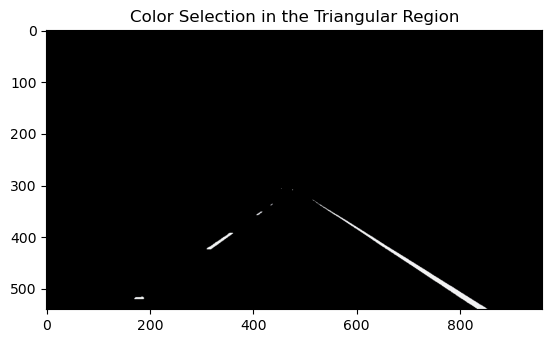

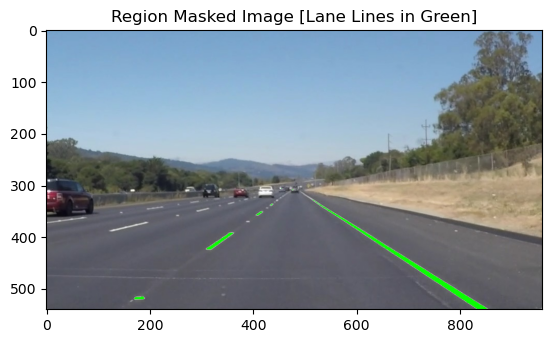

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('c:/Users/RATHIKA/test_images/solidWhiteRight.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()

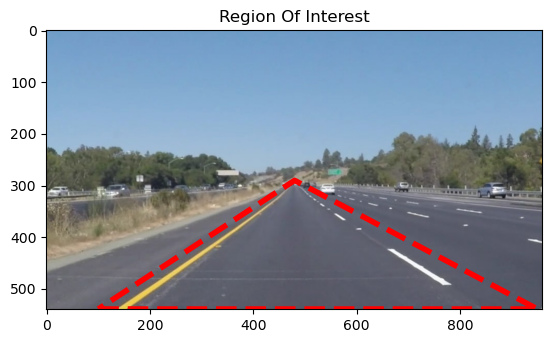

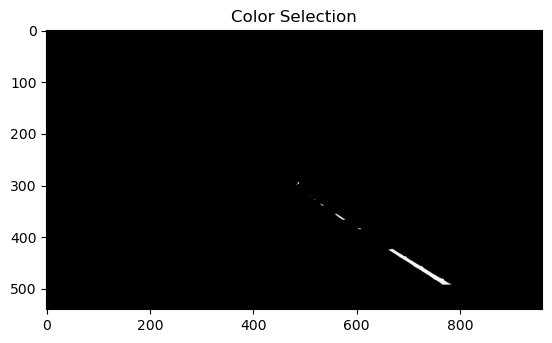

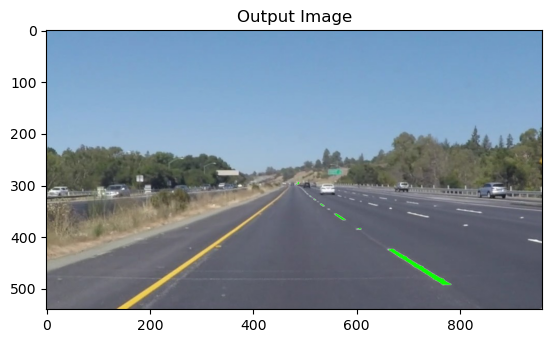

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('c:/Users/RATHIKA/test_images/solidYellowLeft.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

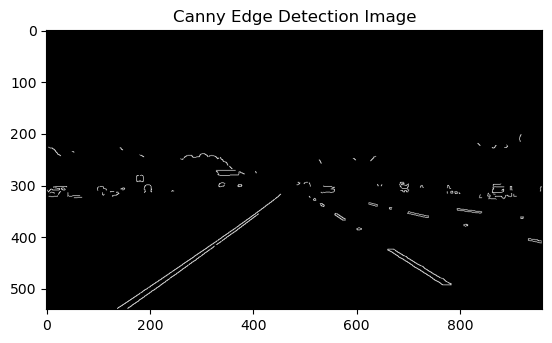

In [5]:
image = mpimg.imread('c:/Users/RATHIKA/test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

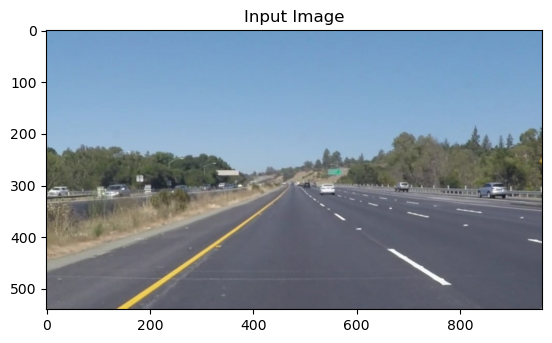

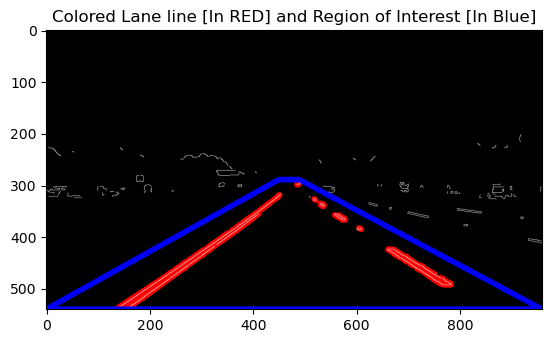

In [18]:
image = mpimg.imread('c:/Users/RATHIKA/test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()

In [45]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
     
    imshape = image.shape
    vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)



    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
        
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    
    return masked_image

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    line_img = slope_lines(line_img,lines)
    return line_img


def weighted_img(img, initial_img, α=0.1, β=1., γ=0.):
    lines_edges = cv2.addWeighted(initial_img, α, img, β, γ)
    return lines_edges

def get_vertices(img):
    rows, cols = img.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6] 
    
    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    
    return ver
def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
   
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image,lines):
    
    img = image.copy()
    poly_vertices = []
    order = [0,1,3,2]

    left_lines = [] # Like /
    right_lines = [] # Like \
    for line in lines:
        for x1,y1,x2,y2 in line:

            if x1 == x2:
                pass #Vertical Lines
            else:
                m = (y2 - y1) / (x2 - x1)
                c = y1 - m * x1
            if not np.isnan(m) and not np.isinf(m) and not np.isnan(c) and not np.isinf(c):
                if m < 0:
                    left_lines.append((m,c))
                elif m >= 0:
                    right_lines.append((m,c))

    left_line = np.mean(left_lines, axis=0)
    right_line = np.mean(right_lines, axis=0)
    print(left_line,right_line)

    if not np.isnan(left_line).any() and not np.isnan(right_line).any():

        for slope, intercept in [left_line, right_line]:

        #getting complete height of image in y1
            rows, cols = image.shape[:2]
            y1= int(rows) #image.shape[0]

        #taking y2 upto 60% of actual height or 60% of y1
            y2= int(rows*0.6) #int(0.6*y1)

        #we know that equation of line is y=mx +c so we can write it x=(y-c)/m
            x1=int((y1-intercept)/slope)
            x2=int((y2-intercept)/slope)
            poly_vertices.append((x1, y1))
            poly_vertices.append((x2, y2))
            cv2.line(img, (x1,y1),(x2,y2),(0,255,0),10)
    
        poly_vertices = [poly_vertices[i] for i in order]
    
        cv2.fillPoly(img, pts = np.array([poly_vertices],'int32'), color = (0,255,0))
    return img
    




In [46]:
# Lane finding Pipeline
def lane_finding_pipeline(image):
    
    #Grayscale
    gray_img = grayscale(image)
    #plt.figure(figsize = (12,6))
    plt.imshow(gray_img,cmap='gray')
    #Gaussian Smoothing
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 5)
    plt.imshow(smoothed_img,cmap='gray')
    #Canny Edge Detection
    canny_img = canny(img = smoothed_img, low_threshold = 180, high_threshold = 240)
    plt.imshow(canny_img,cmap='gray')
    #Masked Image Within a Polygon
    masked_img = region_of_interest(img = canny_img, vertices = get_vertices(image))
    plt.imshow(masked_img,cmap='gray')
    #Hough Transform Lines
    houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
    plt.imshow(houghed_lines,cmap='gray')
     #Draw lines on edges
    output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)
    plt.imshow(output,cmap='gray')
    
    return output
   
    
    

[-4.77288136e-01  5.53809831e+02] [   1.01370615 -291.37048807]


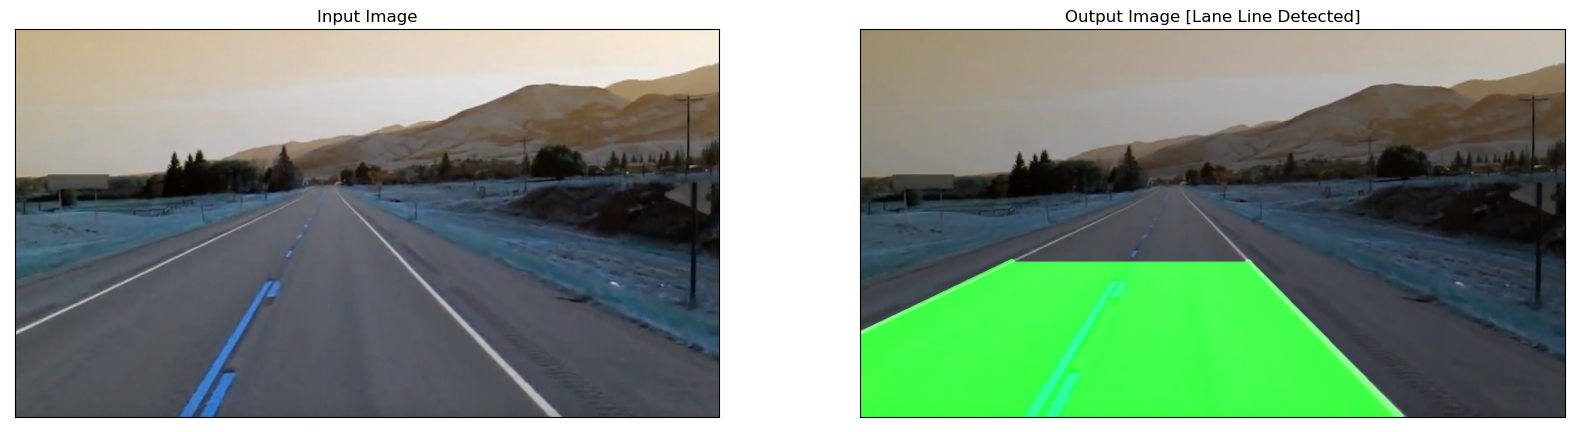

In [47]:
fig = plt.figure(figsize=(20, 10))
image = mpimg.imread('c:/Users/RATHIKA/test_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
image *= 255/image.max() 
image = image.astype(np.uint8)
ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
plt.imshow(image)
ax.set_title("Input Image")
ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
plt.imshow(lane_finding_pipeline(image))
ax.set_title("Output Image [Lane Line Detected]")
plt.show()

In [48]:
from IPython.display import HTML

[ -0.76025508 665.90317265] [ 0.61600589 10.34686257]
Moviepy - Building video c:/Users/RATHIKA/test_videos/challenge.mp4.
Moviepy - Writing video c:/Users/RATHIKA/test_videos/challenge.mp4



t:   1%|          | 2/221 [00:00<00:12, 16.95it/s, now=None]

[ -0.76025508 665.90317265] [ 0.61600589 10.34686257]
[ -0.74811578 661.16750899] [ 0.59688456 20.92715685]


t:   3%|▎         | 7/221 [00:00<00:21,  9.87it/s, now=None]

[ -0.74950442 661.91757899] [0.6178989  9.77486903]
[ -0.71115969 647.16233881] [0.61880464 7.84609871]
[ -0.71363636 647.49090909] [ 0.61328624 10.8497904 ]
[ -0.71951659 648.70580808] [ 0.61334234 10.94291024]
[ -0.7295784  652.82430076] [ 0.61314224 11.05630402]


t:   6%|▌         | 13/221 [00:01<00:13, 15.55it/s, now=None]

[ -0.73153327 653.03866924] [0.61122538 9.81771441]
[ -0.72114322 649.78641703] [0.61779203 9.04470824]
[ -0.72769486 653.62859246] [ 0.61482028 12.74185061]
[ -0.72657423 655.78320944] [ 0.55589226 45.78082665]
[-5.91370504e-01  5.94191134e+02] [ 0.62489951 10.71279019]


t:   7%|▋         | 16/221 [00:01<00:11, 17.45it/s, now=None]

[ -0.70828076 648.2611528 ] [ 0.56598527 37.47915128]
[ -0.72736474 653.27939854] [0.63598054 2.43723468]
[ -0.70176586 641.36429039] [0.63669646 0.09387271]
[ -0.7110653  643.07743469] [  0.65409752 -11.19666605]
[ -0.68064993 629.93199699] [ 0.64496037 -6.49123477]


t:  10%|▉         | 22/221 [00:01<00:10, 19.89it/s, now=None]

[ -0.67597753 629.58512049] [  0.6619698  -16.12011083]
[ -0.69423077 638.84110577] [ 0.63937759 -2.5246829 ]
[ -0.70311275 643.52910348] [ 0.64318946 -2.47671393]
[ -0.69989969 644.09261509] [0.63999082 0.97832428]
[ -0.71155773 647.57483843] [ 0.54682654 47.21402616]


t:  11%|█▏        | 25/221 [00:01<00:09, 20.40it/s, now=None]

[ -0.72632493 654.34212098] [ 0.64248416 -1.15607174]
[ -0.71056672 646.76499687] [0.63595267 3.0965045 ]
[ -0.70299522 645.19625934] [0.63590223 3.10015126]
[ -0.72702186 655.39298018] [ 0.55845586 39.77419287]


t:  14%|█▍        | 31/221 [00:01<00:10, 18.79it/s, now=None]

[ -0.7255852  654.37916046] [ 0.64297864 -2.82426556]
[ -0.72398104 652.37196772] [ 0.63867622 -0.94582681]
[ -0.71357451 649.03546534] [ 0.63744598 -0.57942466]
[ -0.7320373  655.16571398] [ 0.63740768 -0.80220774]


t:  15%|█▌        | 34/221 [00:02<00:09, 19.72it/s, now=None]

[ -0.71313159 647.44851431] [0.63181602 1.19047994]
[ -0.7200104  649.75098807] [0.63249122 0.54076316]
[ -0.71846911 648.9529353 ] [ 0.63559847 -1.17854181]
[ -0.733497   655.78927987] [0.63253721 1.11953783]
[ -0.73820296 657.30647543] [ 0.63839862 -1.31228166]


t:  18%|█▊        | 40/221 [00:02<00:08, 20.51it/s, now=None]

[ -0.59932379 596.79376229] [0.6389672  0.02797189]
[ -0.71821185 653.30224169] [ 0.63879255 -0.18480293]
[ -0.61378257 600.40002451] [ 0.6398604  -0.55294866]
[ -0.7466098  660.66231267] [ 0.64025658 -1.47987788]
[ -0.74251795 659.56423292] [  0.65722853 -12.86754075]


t:  19%|█▉        | 43/221 [00:02<00:08, 20.86it/s, now=None]

[ -0.73910977 656.87563869] [0.63005502 3.19202887]
[ -0.73682997 655.05128812] [  0.69016366 -29.85218069]
[ -0.72208519 649.47951574] [  0.65594586 -10.32605429]
[ -0.74255189 656.76263736] [  0.6761113  -24.43297481]
[ -0.74468597 656.71694029] [ 0.63851722 -0.76363447]


t:  21%|██        | 46/221 [00:02<00:08, 19.90it/s, now=None]

[ -0.72265265 647.78757225] [ 0.6460439  -7.13879452]
[ -0.73748762 653.84504665] [  0.65696546 -16.1834292 ]


t:  24%|██▎       | 52/221 [00:03<00:10, 16.10it/s, now=None]

[ -0.72126264 647.66006638] [ 0.65228869 -9.93632383]
[ -0.71146328 646.20169106] [ 0.64679225 -7.24658225]
[ -0.71794926 646.88987934] [ 0.64958027 -8.24559163]
[ -0.72100246 646.85449765] [ 0.63979025 -2.91665047]


t:  24%|██▍       | 54/221 [00:03<00:12, 13.25it/s, now=None]

[ -0.68026276 629.34916853] [  0.65358436 -13.11970485]
[ -0.68958509 634.76170451] [0.62681214 3.69883256]


t:  25%|██▌       | 56/221 [00:03<00:11, 14.30it/s, now=None]

[ -0.71068182 641.63566437] [ 0.65174249 -7.5889334 ]
[ -0.68507539 631.37798273] [ 0.6400027  -2.70455242]
[ -0.63371819 611.71093129] [0.63806188 3.16509194]


t:  27%|██▋       | 60/221 [00:03<00:11, 14.07it/s, now=None]

[ -0.6908002 636.3571846] [0.64020504 0.61702728]
[ -0.68292484 634.38622056] [  0.66393932 -13.07754482]
[ -0.69612046 638.43871983] [ 0.64950224 -3.8158063 ]


t:  28%|██▊       | 62/221 [00:03<00:11, 13.42it/s, now=None]

[ -0.72598015 648.46787824] [ 0.64512128 -2.50744999]
[ -0.69552022 638.81147979] [ 0.64513466 -2.13355456]
[ -0.69520625 638.97318895] [  0.65861374 -11.19621138]


t:  30%|██▉       | 66/221 [00:04<00:11, 12.95it/s, now=None]

[ -0.67242542 629.34043366] [  0.66436438 -15.26934426]
[ -0.64939288 619.75248826] [  0.66511805 -13.12257523]
[ -0.64897752 619.57103945] [ 0.656546   -9.31445113]


t:  31%|███       | 69/221 [00:04<00:09, 15.23it/s, now=None]

[ -0.68520189 633.26842952] [ 0.65087489 -7.33275616]
[ -0.6873157  632.45336918] [ 0.65395957 -9.23577207]
[ -0.68058487 629.4290607 ] [  0.6575489  -11.57583438]
[ -0.67316833 627.54119502] [  0.67397747 -19.75782985]
[ -0.6651235  624.85239705] [  0.6572295  -10.31729664]


t:  33%|███▎      | 74/221 [00:04<00:08, 16.95it/s, now=None]

[ -0.68625149 634.17227437] [  0.65796066 -11.35342332]
[ -0.69134455 634.50015599] [  0.66243097 -13.20200167]
[ -0.66899766 625.67775682] [  0.65759595 -10.31423035]
[ -0.65969851 621.95255732] [  0.65950867 -10.51675839]


t:  35%|███▌      | 78/221 [00:04<00:07, 18.10it/s, now=None]

[ -0.67266804 627.96597035] [ 0.65728965 -9.35574375]
[ -0.67531236 627.14502454] [  0.66041006 -10.75250003]
[ -0.66587965 623.92687035] [  0.66514359 -12.87998789]
[ -0.64744932 615.24518805] [  0.66424091 -11.19461583]


t:  37%|███▋      | 82/221 [00:05<00:07, 17.40it/s, now=None]

[ -0.64978202 616.05302874] [  0.69710456 -29.67369184]
[ -0.65987147 620.92029221] [  0.67754277 -19.76913225]
[ -0.64903688 616.57364837] [  0.68299864 -23.97887578]
[ -0.66797042 624.80728632] [  0.66893782 -14.04066305]
[ -0.68224276 629.2905186 ] [  0.68263497 -23.66838805]


t:  39%|███▉      | 87/221 [00:05<00:07, 17.45it/s, now=None]

[ -0.6313237 608.8838226] [ 0.6607347  -9.91701546]
[ -0.64438998 614.80659041] [  0.68292221 -23.7626429 ]
[ -0.66717269 624.30997731] [  0.66307298 -11.81832396]


t:  40%|████      | 89/221 [00:05<00:09, 14.03it/s, now=None]

[ -0.62989523 608.56590752] [  0.66564748 -13.09720194]
[ -0.66426768 624.25113636] [  0.68459846 -23.77392154]
[ -0.64689209 616.27780166] [  0.67645833 -18.3539145 ]


t:  41%|████      | 91/221 [00:05<00:12, 10.10it/s, now=None]

[ -0.65800045 622.10218363] [  0.67314158 -16.07997756]


t:  42%|████▏     | 93/221 [00:08<00:56,  2.27it/s, now=None]

[ -0.65564155 622.09980602] [  0.71084323 -39.76732933]
[ -0.64274933 617.8009233 ] [  0.68517111 -23.09454831]
[ -0.67373706 629.62297038] [  0.69671305 -29.56864503]
[ -0.66461431 626.46970777] [  0.68458877 -24.09701087]


t:  45%|████▍     | 99/221 [00:08<00:25,  4.87it/s, now=None]

[ -0.6625985  623.78205745] [  0.67851477 -19.2412125 ]
[ -0.68435862 632.9449616 ] [  0.66352735 -12.47274893]
[ -0.65797414 621.41699084] [  0.70793534 -40.27269792]
[ -0.63977381 614.46572726] [  0.68883005 -28.57614651]
[ -0.69245021 634.89492706] [  0.6941834  -34.05557308]
[ -0.63390496 612.45102541] [  0.69613527 -35.34489414]


t:  47%|████▋     | 104/221 [00:09<00:16,  7.07it/s, now=None]

[ -0.67714912 629.09799651] [  0.700124   -37.14376911]
[-5.27810809e-01  5.61125481e+02] [  0.70065811 -36.97309094]
[-5.53815735e-01  5.72137622e+02] [  0.6937254  -30.54142476]
[-4.13480924e-01  5.08738681e+02] [  0.6931178  -30.15764053]
[-5.68765968e-01  5.80344822e+02] [  0.69012839 -29.41993388]


t:  50%|████▉     | 110/221 [00:09<00:09, 11.15it/s, now=None]

[-5.67235589e-01  5.84334604e+02] [  0.68801197 -30.5819574 ]
[ -0.68158139 633.36760591] [  0.68663765 -29.36906838]
[ -0.60175097 595.08969109] [  0.68763582 -31.50884499]
[-5.77810047e-01  5.83568213e+02] [0.61143442 7.48705262]
[-5.50784642e-01  5.70684065e+02] [  0.68991482 -31.30680414]


t:  52%|█████▏    | 115/221 [00:09<00:07, 14.26it/s, now=None]

[ -0.67624306 631.53938958] [  0.68492525 -28.42294248]
[-5.35662319e-01  5.66554489e+02] [  0.68033142 -26.70455526]
[-5.53292034e-01  5.73599501e+02] [  0.68612955 -29.89235459]
[-5.3335692e-01  5.6629382e+02] [  0.67178597 -20.87823875]
[ -0.66056353 625.10246374] [  0.68074989 -28.89271748]


t:  54%|█████▍    | 119/221 [00:09<00:06, 15.92it/s, now=None]

[ -0.66753445 628.32360214] [  0.68261042 -30.73220366]
[ -0.66161016 625.25962113] [  0.66490282 -17.91013796]
[ -0.68456568 632.90844619] [  0.66676236 -18.32910657]
[-5.49083339e-01  5.71344044e+02] [  0.66210878 -16.29293517]


t:  57%|█████▋    | 126/221 [00:10<00:07, 12.73it/s, now=None]

[ -0.67425088 631.80897129] [  0.65741686 -12.78308744]
[-5.7473226e-01  5.8483331e+02] [0.63564797 1.74621541]
[ -0.7064427 645.769063 ] [ 0.5648885  35.54641394]
[ -0.68374579 637.80789069] [ 0.59003826 19.46272862]
[ -0.68827586 638.69241379] [ 0.55376385 40.08467032]
[ -0.69422715 640.5247307 ] [ 0.57946776 27.55512088]


t:  58%|█████▊    | 128/221 [00:10<00:06, 13.93it/s, now=None]

[-4.45414354e-01  5.22082495e+02] [ 0.63835676 -2.33003525]
[-5.09063616e-01  5.53525884e+02] [ 0.63973656 -1.60677667]
[-5.81399062e-01  5.88220979e+02] [ 0.63801708 -2.57014239]
[-5.13889412e-01  5.56002615e+02] [ 0.63806353 -2.47636563]


t:  60%|██████    | 133/221 [00:10<00:05, 15.80it/s, now=None]

[ -0.70969996 649.20858396] [ 0.6374809  -2.03587274]
[ -0.61339177 605.15134611] [ 0.56577779 31.5494073 ]
[-5.59654387e-01  5.79259574e+02] [0.63301259 0.84149435]
[ -0.72091583 653.94133312] [ 0.63556854 -0.45470923]


t:  62%|██████▏   | 137/221 [00:11<00:04, 17.25it/s, now=None]

[ -0.71875857 652.59948267] [ 0.53395588 49.65865762]
[ -0.62027407 605.00060484] [ 0.64013897 -4.60775082]
[ -0.70898999 645.51611061] [ 0.63851531 -4.95526407]


t:  63%|██████▎   | 139/221 [00:11<00:11,  6.94it/s, now=None]

[-5.65573010e-01  5.77831806e+02] [ 0.63519684 -6.46381839]
[ -0.59986278 594.00643764] [ 0.63396871 -3.41225864]
[ -0.71156554 647.93906425] [ 0.63614692 -3.46272006]


t:  65%|██████▍   | 143/221 [00:12<00:08,  9.48it/s, now=None]

[ -0.71608252 651.86498957] [ 0.63554387 -1.91623361]
[ -0.72199313 653.95829193] [ 0.640253   -5.24405272]
[ -0.71921799 653.54927627] [ 0.55839632 37.6312097 ]
[ -0.61564551 604.94671868] [ 0.63650126 -1.35163252]
[ -0.60058159 600.57217789] [ 0.6376911  -2.44688147]


t:  67%|██████▋   | 148/221 [00:12<00:05, 12.90it/s, now=None]

[ -0.710759   651.90877745] [ 0.56487704 35.12956416]
[ -0.63652009 614.30614603] [ 0.63166469 -1.33755433]
[ -0.73806169 660.79303609] [ 0.5414403  43.07725789]
[ -0.75964838 668.09262986] [ 0.63197179 -3.56795551]


t:  69%|██████▉   | 152/221 [00:12<00:04, 14.32it/s, now=None]

[ -0.73599346 660.54296618] [ 0.63006289 -3.42294375]
[ -0.72616045 656.49703155] [ 0.63620627 -5.3295551 ]
[ -0.71646833 652.83560613] [ 0.63625902 -7.12641658]
[ -0.74428292 664.10313843] [0.62516837 0.40715001]
[ -0.72747842 657.91852635] [ 0.60346448 17.42193304]


t:  71%|███████▏  | 158/221 [00:12<00:03, 18.01it/s, now=None]

[ -0.73780305 661.63638489] [ 0.63007444 -2.4183596 ]
[-5.84729575e-01  5.90516183e+02] [ 0.63707776 -7.31997495]
[ -0.72222848 654.16040025] [ 0.6322405  -4.83750378]
[ -0.72720329 656.90317477] [0.62202753 2.74414412]
[ -0.61082538 602.63044512] [0.61922529 4.41174061]


t:  73%|███████▎  | 161/221 [00:13<00:03, 19.02it/s, now=None]

[ -0.61060293 602.8755515 ] [ 0.63183609 -3.93695994]
[ -0.62549723 608.25610194] [0.61579026 5.12720814]
[ -0.78681076 682.94448181] [ 0.54574289 39.90417373]


t:  75%|███████▍  | 165/221 [00:13<00:03, 14.99it/s, now=None]

[ -0.73292937 662.64242291] [0.60817413 8.63459397]
[ -0.61596636 606.21580273] [ 0.60404438 10.44828115]
[ -0.76610555 676.33888407] [ 0.59480243 17.80450488]


t:  76%|███████▌  | 167/221 [00:13<00:03, 15.60it/s, now=None]

[-5.83256041e-01  5.90559623e+02] [ 0.51219597 58.66004095]
[ -0.65517215 624.68347073] [ 0.59284873 21.09716814]
[ -0.64294082 619.87565379] [ 0.49100586 70.51318428]
[ -0.67189341 631.46264657] [ 0.58953635 22.79986288]


t:  78%|███████▊  | 172/221 [00:13<00:02, 17.15it/s, now=None]

[ -0.67091955 632.60271975] [ 0.58930684 23.15110508]
[ -0.68518592 640.01036705] [ 0.5868626  24.02447546]
[ -0.69588632 642.34730057] [ 0.59133157 21.79088115]
[ -0.67732919 634.28654474] [ 0.58898633 23.54493024]


t:  81%|████████  | 178/221 [00:14<00:02, 19.55it/s, now=None]

[ -0.66901138 631.811673  ] [ 0.58706775 23.77838895]
[ -0.63934211 615.93927632] [ 0.58959821 22.70757246]
[-5.83664066e-01  5.91050961e+02] [ 0.58448632 24.95490477]
[ -0.78724691 688.17827239] [ 0.53346299 51.12319138]
[ -0.78616701 685.6451074 ] [ 0.5280609  53.30131396]


t:  81%|████████▏ | 180/221 [00:14<00:02, 17.66it/s, now=None]

[-5.69645641e-01  5.83120629e+02] [ 0.58609882 23.99974905]
[ -0.80951354 694.67781946] [ 0.4848308  73.31253318]
[ -0.67125133 630.85262759] [ 0.52793279 50.29128387]


t:  83%|████████▎ | 184/221 [00:14<00:02, 16.18it/s, now=None]

[ -0.79694766 690.12712049] [ 0.457185   85.59920048]
[ -0.68077027 632.50317727] [ 0.51317849 58.4409074 ]
[ -0.81931965 698.35555409] [ 0.46797655 80.57532443]


t:  84%|████████▍ | 186/221 [00:14<00:02, 15.18it/s, now=None]

[ -0.77734805 683.81771867] [ 0.4812433  73.77346547]
[ -0.68814879 635.5643221 ] [ 0.59516486 15.44460503]
[ -0.78925777 685.03829662] [ 0.53949756 43.72804083]


t:  85%|████████▌ | 188/221 [00:15<00:04,  7.85it/s, now=None]

[ -0.82297417 699.42410023] [ 0.51474408 59.76240518]


t:  86%|████████▌ | 190/221 [00:15<00:03,  8.77it/s, now=None]

[ -0.62468451 604.83704763] [ 0.58913105 19.69092858]
[ -0.79746649 684.68220944] [ 0.58589131 18.84877402]
[ -0.81096632 689.031218  ] [ 0.58500256 16.45495688]


t:  88%|████████▊ | 194/221 [00:15<00:02, 11.46it/s, now=None]

[ -0.78287172 680.84495829] [ 0.56280286 32.6228871 ]
[ -0.7159371  646.46420848] [ 0.56719134 30.91157659]
[ -0.79238502 689.1242877 ] [ 0.46881422 84.16206002]
[ -0.69873999 642.8829011 ] [ 0.51110203 61.11890305]


t:  90%|████████▉ | 198/221 [00:15<00:01, 14.56it/s, now=None]

[ -0.67896024 633.02949681] [ 0.51243495 60.74385523]
[ -0.78210137 684.92307246] [ 0.51396333 60.99946685]
[ -0.77298342 679.7799637 ] [ 0.5862469  23.67428386]
[ -0.73330254 663.45401126] [ 0.51487602 59.27467866]


t:  91%|█████████▏| 202/221 [00:16<00:01, 15.67it/s, now=None]

[ -0.77083263 677.10252582] [ 0.58725703 21.65132485]
[ -0.65884695 624.16862197] [ 0.59345341 19.7901943 ]
[ -0.66336585 626.16227196] [ 0.58623493 21.60254508]
[ -0.80042528 688.7538327 ] [ 0.58516551 21.14861792]


t:  94%|█████████▎| 207/221 [00:16<00:00, 17.49it/s, now=None]

[ -0.77535758 680.92180947] [ 0.50537477 66.6032759 ]
[ -0.77709676 679.94250711] [ 0.56657266 34.14035859]
[ -0.78339094 682.8791469 ] [ 0.56810662 32.70117361]
[ -0.79365904 686.5987462 ] [ 0.56664125 33.4461835 ]
[ -0.77768569 680.43394084] [ 0.56912936 30.67468181]


t:  95%|█████████▌| 211/221 [00:16<00:00, 16.46it/s, now=None]

[ -0.77959844 681.29461793] [ 0.51416059 57.24116276]
[ -0.7802301  680.67222523] [ 0.48303465 75.21533384]
[ -0.7755942  677.97051022] [ 0.56542374 32.26407674]
[ -0.6266405 609.0555438] [ 0.56482447 32.39833352]


t:  97%|█████████▋| 215/221 [00:16<00:00, 16.08it/s, now=None]

[ -0.62765184 610.58220319] [ 0.56503237 33.90936183]
[ -0.64586848 615.37714997] [ 0.48338749 76.11609627]
[ -0.79542462 687.80208374] [ 0.56456254 37.23801563]
[ -0.80120316 689.57167419] [ 0.56433613 35.80775001]


t:  98%|█████████▊| 217/221 [00:17<00:00, 13.33it/s, now=None]

[ -0.68870161 636.75389733] [ 0.45485026 92.22907237]
[ -0.60780483 601.40657813] [ 0.56549282 36.81081712]
[ -0.7206285  651.64103449] [ 0.48776281 75.44743085]


t: 100%|██████████| 221/221 [00:17<00:00, 12.33it/s, now=None]

[ -0.70240521 645.25019143] [ 0.47011168 83.85858977]
[ -0.77906515 680.42976713] [ 0.49939509 69.42324261]
[ -0.78156205 682.31901626] [ 0.5011271 68.5631212]


Moviepy - Done !
Moviepy - video ready c:/Users/RATHIKA/test_videos/challenge.mp4
Wall time: 20.3 s


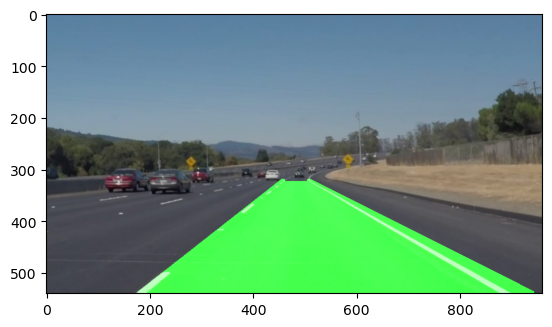

In [50]:
white_output = 'c:/Users/RATHIKA/test_videos/challenge.mp4'


clip1 = VideoFileClip("c:/Users/RATHIKA/test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(lane_finding_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)